In [3]:
import numpy as np

In [4]:
class Perceptron(object) :
    """Perceptron classifier.
    
    Parameters
    _______________
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    _______________
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta = 0.01, n_iter = 10) :
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y) :
        """Fit training data.
        Parameters
        _______________
        X : {array-like}, shape = [n_smaples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        Y : array-like, shape = [n_samples]
            Target values.
            Returns
            _______________
            self : object
            """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter) :
            errors = 0
            for xi, target in zip(X, y) :
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X) :
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X) :
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [6]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
y = df.iloc[0:100, 4].values   ### iloc -> 0:100째 자료에 대해 0, 2번째 feature를 가져옴

In [9]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [10]:
X = df.iloc[0:100, [0, 2]].values

In [11]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
#plt.show()

In [12]:
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
#plt.show()

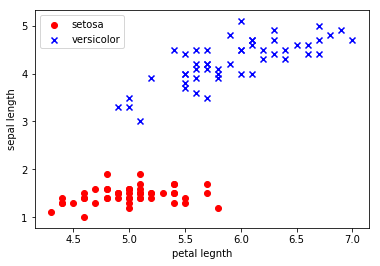

In [13]:
plt.xlabel('petal legnth')
plt.ylabel('sepal length')
plt.legend(loc = 'upper left')
plt.show()

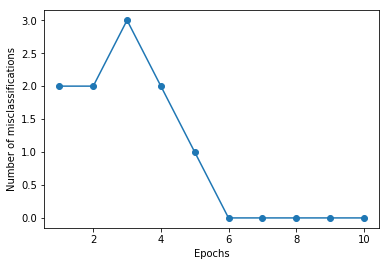

In [14]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show() ### 학습을 거듭할수록 오분류 수는 줄어들고 있다.

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution = 0.02) :
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)) :
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                   alpha = 0.8, c = cmap(idx),
                   marker = markers[idx], label = cl)

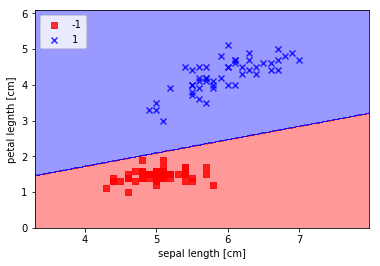

In [16]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal legnth [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [21]:
class AdalineGD(object) :
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
        """
    def __init__(self, eta = 0.01, n_iter = 50) :
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y) :
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shpae = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and
            n_features is the number of features
        y : array-like, shape = [n_smaples]
            Target values
            
        Returns
        ----------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter) :
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors **2).sum() / 2.0
            self.cost_.append(cost)
        return self


    def net_input(self, X) :
        """ Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X) :
        """Compute linear activation"""
        return self.net_input(X)
    def predict(self, X) :
        """Return class label after unit step"""
        return np.where(self.activation(x) >= 0.0, 1, -1)

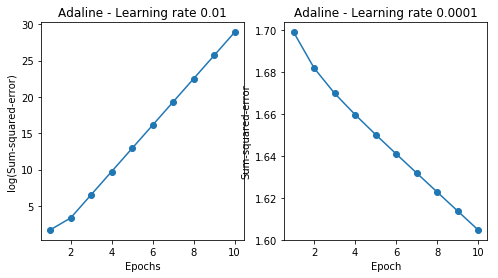

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) +1),
          np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) +1),
          np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()